In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:

from copy import deepcopy
from numpy.linalg import norm

In [33]:

data = pd.read_csv('https://raw.githubusercontent.com/PaulafloresS/PythonML-PrebecariosProteco/master/Proyecto/COVID19_open_line_list.csv', header = 0)
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True)
data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [35]:
list(data.columns.values)



['ID',
 'age',
 'sex',
 'city',
 'province',
 'country',
 'wuhan(0)_not_wuhan(1)',
 'latitude',
 'longitude',
 'geo_resolution',
 'date_onset_symptoms',
 'date_admission_hospital',
 'date_confirmation',
 'symptoms',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'source',
 'sequence_available',
 'outcome',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'admin3',
 'admin2',
 'admin1',
 'country_new',
 'admin_id',
 'data_moderator_initials']

In [36]:
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [37]:
def arreglarEtiquetas(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan #not a number, no generará errores al gráficar

In [38]:
def regresarEntero(x):
    #Tal vez muchos no lo hayan visto pero igual que en java y otros lenguajes de programación 
    #Python te permite el manejo de excepciones, que son un tipo de error, donde se intenta un bloque
    #de código con try y si eso lleva a una excepción en vez de que generé que pare la ejecución 
    #puedes redirigir a otro bloque de código
    try:
        y = int(x) #En caso que la conversión levante una excepción
        return y
    except:
        return np.nan #Dicho valor se reasigna a not a number

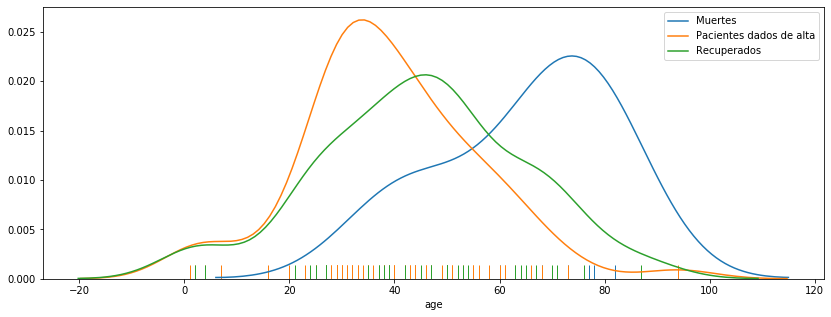

In [39]:
plt.figure(figsize=(14,5))
#Plotearemos son seaborns (sns) las tres posibles resoluciones de los casos, notése que aplicamos las funciones a los datos para poderlos gráficar
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='death']['age'].apply(regresarEntero),hist=False,rug=True,label='Muertes')
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='discharge']['age'].apply(regresarEntero),hist=False,rug=True,label='Pacientes dados de alta')
sns.distplot(data[data['outcome'].apply(arreglarEtiquetas)=='recovered']['age'].apply(regresarEntero),hist=False,rug=True,label='Recuperados')

plt.legend()
plt.show()


*- Apartir de aquí haré cosas muy locochonas que no van a a funcionar pero que espero puedas revisar o tengas una mejor idea -*

In [40]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,ID,wuhan(0)_not_wuhan(1),latitude,longitude,chronic_disease_binary
count,13173.000000,13170.0,13147.000000,13147.000000,18.000000
mean,6769.250436,1.0,31.994650,110.495353,0.722222
std,3920.886020,0.0,7.536335,27.985144,0.460889
min,1.000000,1.0,-37.813600,-124.953070,0.000000
25%,3351.000000,1.0,27.905380,111.729600,0.250000
50%,6865.000000,1.0,31.759410,115.441800,1.000000
75%,10180.000000,1.0,35.781340,120.440400,1.000000
max,13479.000000,1.0,69.649468,153.400000,1.000000


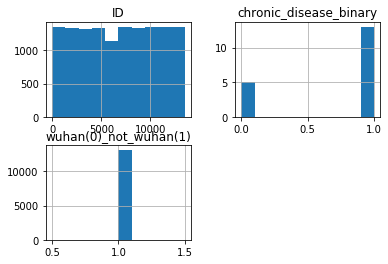

In [41]:
#En estas gráficas vemos entre qué valores se concentran la mayoría de registros.
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['death'','discharge', 'longitude'],1).hist()
plt.show()

In [48]:

# Para poder graficar en 3D, haremos una variable nueva que será la suma de los muertos, recuperados y dados de alta
suma = (filtered_data["death"] + filtered_data['discharge'].fillna(0) + filtered_data['recovered'])
 
dataX2 =  pd.DataFrame()
dataX2["death"] = filtered_data["death"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['discharge'].values

NameError: name 'filtered_data' is not defined

In [43]:

# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

NameError: name 'linear_model' is not defined

In [44]:

fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de muertos')
ax.set_ylabel('Cantidad de recuperados)
ax.set_zlabel('Cantidad de dados de alta')
ax.set_title('Regresión Lineal con Múltiples Variables')

SyntaxError: EOL while scanning string literal (<ipython-input-44-c431d66ceabf>, line 27)

In [50]:

# Si quiero predecir cuántos recuperados voy a obtener con: 
# 2000 dados de alta y con muertos 10
# según nuestro modelo, hacemos:
 
z_Dosmil = regr2.predict([[2000, 10]])
print(int(z_Dosmil))

NameError: name 'regr2' is not defined


Checa esta pagina 


https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
